In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pylab as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pickle
import joblib
#Save model pickle
#https://es.acervolima.com/guardar-un-modelo-de-aprendizaje-automatico/

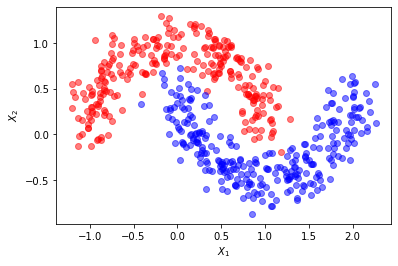

In [2]:
X0, y0 = make_moons(n_samples=800, noise=0.15, shuffle=True,  random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X0, y0, test_size=0.33, random_state=42)

plt.figure()
plt.plot(X_train[:,0][y_train==0],X_train[:,1][y_train==0],"ro", alpha=0.5)
plt.plot(X_train[:,0][y_train==1],X_train[:,1][y_train==1],"bo", alpha=0.5)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [3]:
# params={"max_depth":[2,4,6,8],"n_estimators":[50,100,200]}
# clf = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params)
# clf.fit(X_train,y_train)
# clf.best_estimator_
clf = RandomForestClassifier(max_depth=8, n_estimators=200, min_samples_leaf=4)
model_rf = clf.fit(X_train,y_train)


In [4]:
print(model_rf.score(X_train,y_train))
print(model_rf.score(X_test,y_test))

0.9925373134328358
0.9810606060606061


In [5]:
#save the model
joblib.dump(model_rf,"model_rf.pkl")

['model_rf.pkl']

In [6]:
#load the model
model_rf_joblib = joblib.load('model_rf.pkl') 

In [7]:
#prediction
model_rf_joblib.predict(X_test)

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0])

In [8]:
X_test
import numpy as np
model_rf_joblib.predict(np.array([[1,5]]))
print(model_rf_joblib.predict(np.array([[0.5,-0.5]]))[0])

1


# Laboratorio API

- Construir una api en  la que pasados las caracteristicas(por ejemplo desde Postman) realice la predicción 
- Construir un api en el que pasados las caracteristicsa como un archivo  archivo json(desde postman) la api realice una predicción.


Para ello construya los siguientes endpoints:



1. Construir una api en flask que cumpla la siguiente arquitectura 

```
|---->Modelo
      -web_app.py

      |---->templates
                -index.html  #Directorio con los archivos html
      |---->DataModel
                -model_rf.pkl  #Directorio con los datos almacenados del modelo
      |---->Routes
                -routes.py #Directorio con la libreria que tiene las rutas 
      |---->Librerias
                -lib.py #Directorio con las librerias en python
                -main_lib.py #Directorio que permite ejecutar las librerias lib, no es necesarios cuando se ejecute dentro de la api, se puede hacer una llamado directo a las librerias lib.py
      


```




El archivo Routes/routes.py deberá tener los siguientes endpoints:


1. Endpoint "/", debera contener el titulo del modelo, para ello deberá direccionar a un archivo con extension html que muestre el titulo del modelo.

  ```
  @app.route("/")
  def index():
      return render_template("index.html")

  ```

2. Endpoint "/health", deberá tener un metodo GET y POST, servirá para probar el estado de la API

  ```
  @app.route('/health', methods=['GET'])
  def health():
      """
      This view is aimed to verify the healthyness of the API
      :return:
      """
      return Response('{"status":"OK"}', status=200)
  ```

3. Endpoint "/PrediccionParams", deberá tener un metodo GET y un metodo POST, con las predicciones del modelo. Para ello debera lear el archivo .pkl desde el directorio DataModel y tomar las caracteristicas desde los parametros, defina como claves de los parametros los nombres "X1" y "X2".

4. Endpoint "/PrediccionJson", deberá tener un metodo GET y un metodo POST, con las predicciones del modelo. Para ello debera lear el archivo .pkl desde el directorio DataModel y tomar las caracteristicas del archivo json. Al final se debe mostrar en un archivo html los valores de la predicción.



Ayuda:

[Como pasar archivos json  y parametros](https://flask.palletsprojects.com/en/2.2.x/patterns/fileuploads/).

Se puede definir un endpoint llamada read_json y desde alli se sugiere definir una rutina auxiliar (read_params_and_file_json) que recibe los parametros que vienen desde postman u otra aplicación. 

```
from flask import Response,request
```


```
@app.route('/read_json', methods=['GET', 'POST'])
def read_json():
   
    read_params_and_file_json(request.files, **request.args)   
    return Response('{"status":"OK"}', status=200)
```


```
def read_params_and_file_json(*args, **kwargs):

    a = kwargs["variable_entero"]
    b = kwargs["variable_string"]
    print(a,b)
    
    file_json = args[0]
    b = json.load(file_json["ArchivoJson"])
    print(b)
    return "done"
```


En postman, se deberán pasar los párametros como se muestra en la imagen:

![parametros](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Assesment/imagenes_api/params.png?raw=true)


y el archivo json a través del body como se muestra en la imagen:


![arhivo](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Assesment/imagenes_api/sendfiles.png?raw=true)


construya el archivo json con el nombre hello.json con alguna información de prueba:

```
{
  "key1": "LLave tipo string",
  "key2": 2,  
  "Nombres": ["Pedro", "Juan", "Jasinto", "Jose"],
  "NotasCursos": {"Estadistica": 1, "Mecanica Cuantica": 2, "Atomica": "N/A"}
}

```
